In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('financial_loan.csv');df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [3]:
df.shape

(38576, 24)

In [4]:
df.isnull().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,1438
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
# fill null values with mode
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])
print(df['emp_title'].isnull().sum())

0


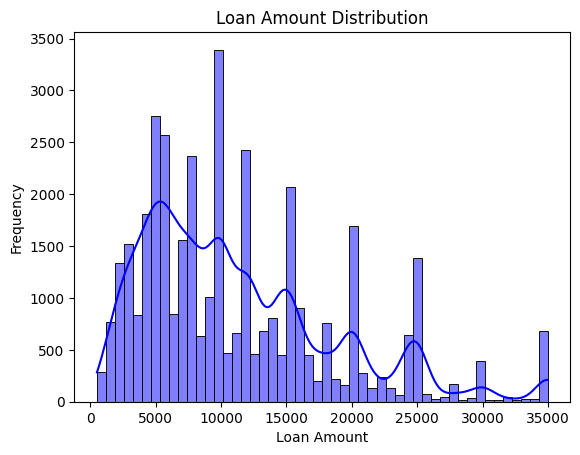

In [7]:
sns.histplot(df['loan_amount'], bins=50, kde=True, color='blue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Loan Status')

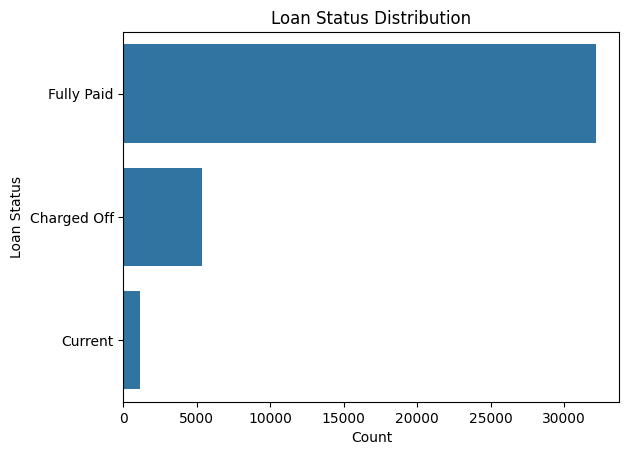

In [8]:
sns.countplot(y='loan_status', data=df, order=df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')

Text(0.5, 1.0, 'Count of grade')

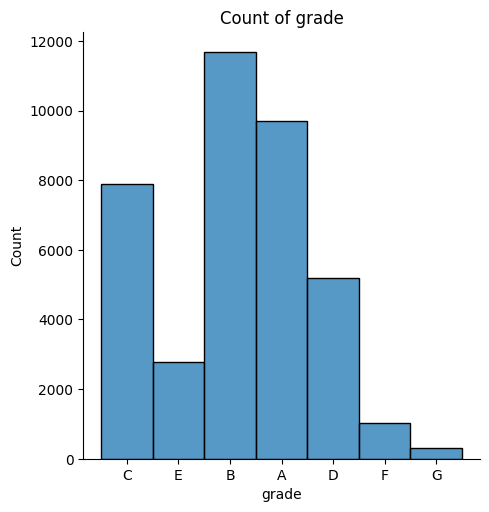

In [9]:
sns.displot(df['grade'])
plt.title('Count of grade')

<Axes: ylabel='count'>

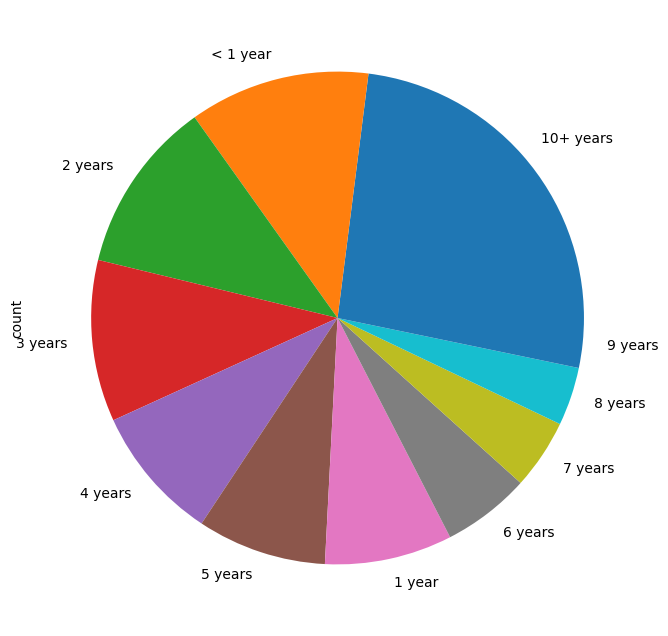

In [10]:
df['emp_length'].value_counts().plot.pie(figsize=(10,8))

<Axes: xlabel='home_ownership'>

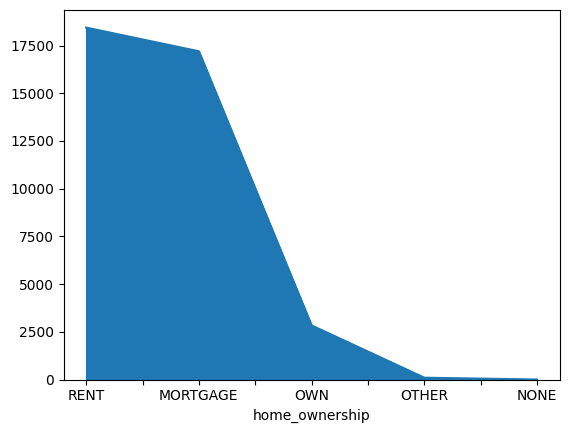

In [11]:
df['home_ownership'].value_counts().plot.area()

<Axes: xlabel='grade', ylabel='loan_amount'>

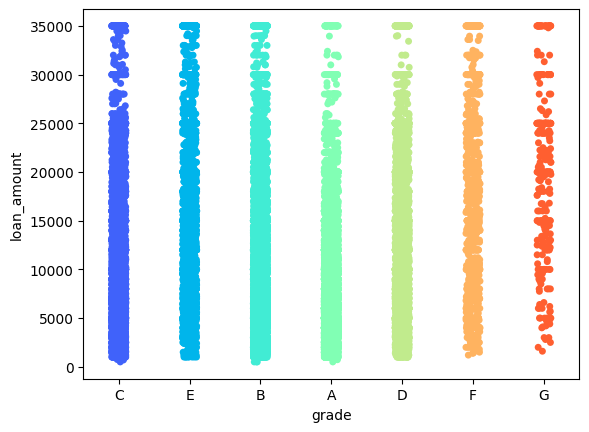

In [12]:
sns.stripplot(x='grade',y='loan_amount',data=df,palette='rainbow')

In [13]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the DataFrame
for col in df.columns:
    # Check if the column's data type is object (categorical)
    if df[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])

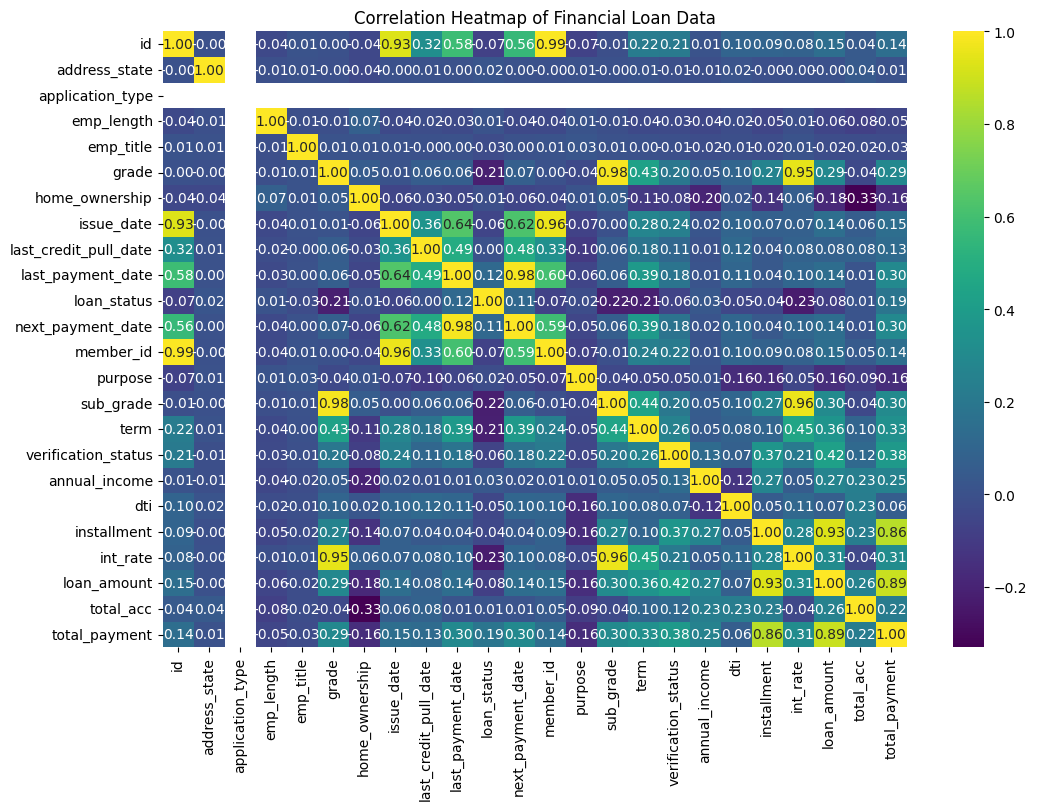

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Financial Loan Data')
plt.show()

In [15]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://download.pytorch.org/whl/cu118


In [16]:
features = df.drop('loan_status', axis=1)
target = 'loan_status'

X = df.drop(columns=[target])
y = df[target]

y = (y == y.unique()[0]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Convert to PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)  # Reshape to (N, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Create datasets and dataloaders
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [19]:
# Define the Model
class LoanModel(nn.Module):
    def __init__(self, input_size):
        super(LoanModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

input_size = X_train.shape[1]
model = LoanModel(input_size)

In [20]:
# Training Loop
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/5], Loss: 0.2655
Epoch [2/5], Loss: 0.1397
Epoch [3/5], Loss: 0.0042
Epoch [4/5], Loss: 0.0056
Epoch [5/5], Loss: 0.0040


In [21]:
# Evaluation
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    predicted = (outputs > 0.5).float()

    correct_predictions = (predicted == y_test).sum().item()
    accuracy = correct_predictions / len(y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9837


In [22]:
# prompt: save model

torch.save(model.state_dict(), 'loan_model.pth')

In [23]:
# Load the model with the correct input size
input_size = 23
model = LoanModel(input_size)
model.load_state_dict(torch.load('loan_model.pth'))
model.eval()

# Sample data with categorical features
new_data = pd.DataFrame({
    'loan_amnt': [10000, 12000],
    'term': [36, 60],
    'int_rate': [10, 12],
    'installment': [300, 350],
    'grade': ['B', 'C'],
    'sub_grade': ['B2', 'C1'],
    'emp_title': ['Engineer', 'Teacher'],
    'emp_length': [10, 5],
    'home_ownership': ['RENT', 'OWN'],
    'annual_inc': [50000, 60000],
    'verification_status': ['Verified', 'Not Verified'],
    'purpose': ['credit_card', 'debt_consolidation'],
    'dti': [18, 20],
    'delinq_2yrs': [0, 1],
    'open_acc': [10, 12],
    'pub_rec': [0, 1],
    'revol_bal': [10000, 12000],
    'revol_util': [50, 60],
    'total_acc': [20, 25],
    'initial_list_status': ['w', 'f'],
    'application_type': ['Individual', 'Joint App'],
    'mort_acc': [0, 1],
    'pub_rec_bankruptcies': [0, 1],

})


# Convert categorical features to numerical using Label Encoding
categorical_features = ['grade', 'sub_grade', 'emp_title', 'home_ownership',
                       'verification_status', 'purpose', 'initial_list_status',
                       'application_type']

le = LabelEncoder()
for feature in categorical_features:
    new_data[feature] = le.fit_transform(new_data[feature])

# Scale numerical features
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Convert to PyTorch Tensor
new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)

# Make predictions
with torch.no_grad():
    predictions = model(new_data_tensor)
    predicted_classes = (predictions > 0.5).float()

print(f"Predictions: {predictions}")
print(f"Predicted Classes: {predicted_classes}")

Predictions: tensor([[0.0676],
        [0.0405]])
Predicted Classes: tensor([[0.],
        [0.]])
